In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

dataset1 = pd.read_csv('mydata.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [10]:
# Name: CHARUKESH S
# Register Number: 212224230044
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}
  def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation here since it's a regression task
        return x

In [11]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

In [12]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [13]:
print("Name: CHARUKESH S")
print("Reg no: 212224230044")
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')
loss_df = pd.DataFrame(ai_brain.history)


Name: CHARUKESH S
Reg no: 212224230044
Epoch [0/2000], Loss: 3813.661865
Epoch [200/2000], Loss: 3066.267822
Epoch [400/2000], Loss: 1930.660400
Epoch [600/2000], Loss: 859.010620
Epoch [800/2000], Loss: 369.504883
Epoch [1000/2000], Loss: 287.341339
Epoch [1200/2000], Loss: 206.891876
Epoch [1400/2000], Loss: 120.149574
Epoch [1600/2000], Loss: 51.414204
Epoch [1800/2000], Loss: 12.336901
Test Loss: 5.673993


Name: CHARUKESH S
Reg no: 212224230044


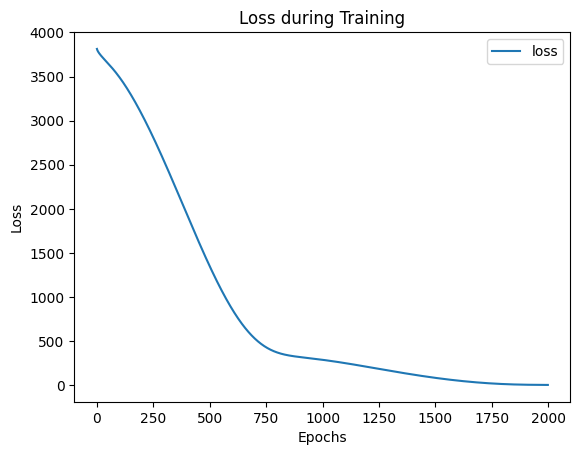

In [16]:
print("Name: CHARUKESH S")
print("Reg no: 212224230044")
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


In [15]:
print("Name: CHARUKESH")
print("Reg no: 212224230044")
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Name: CHARUKESH
Reg no: 212224230044
Prediction: 50.3275260925293
